In [7]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [10]:
# Import txt file

with open('20th_Century.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [12]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914â€“1918)         1.1.2 Russian Revolution and communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise of dictators

In [14]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2', 'Russian', 'Revolution', 'a

In [16]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4818 samples and 21837 outcomes>


In [18]:
dist_words.most_common(10)

[('.', 1571),
 ('the', 1099),
 (',', 963),
 ('of', 604),
 ('and', 398),
 ('The', 327),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('in', 292)]

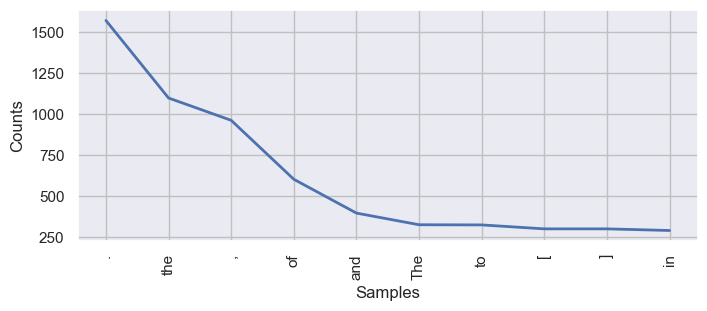

In [22]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

In [28]:
# Removing stopwords in words

from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

filtered_words = [] # creates an empty list
for word in tokenized_word:
      if word not in stop_words:
           filtered_words.append(word)

In [32]:
# Create a new FreqDist for filtered–words

dist_words_filter = FreqDist(filtered_words)
print (dist_words_filter)

<FreqDist with 4715 samples and 17171 outcomes>


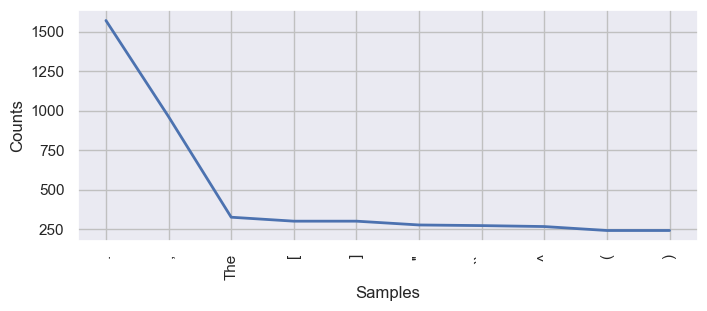

In [38]:
plt.figure(figsize=(8, 3))
dist_words_filter.plot(10,cumulative = False)
plt.show()

In [40]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(filtered_words))

In [44]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print (tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', '

In [46]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

In [48]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [52]:
%%time
text = TextBlob(str(filtered))


CPU times: total: 0 ns
Wall time: 9.33 ms


In [54]:
tags_list = text.tags

In [58]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),

In [60]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top20=df_t.nlargest(20, 'Words')

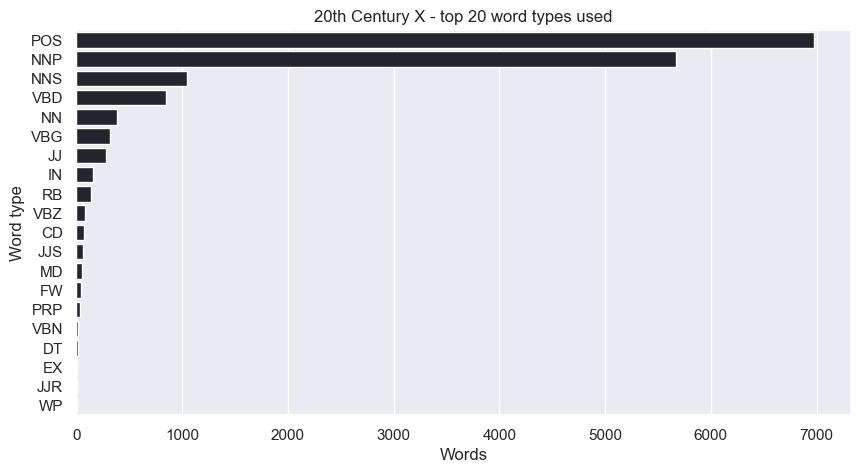

In [62]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top20).set_title("20th Century X - top 20 word types used")

In [91]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(15, 'Occurrences')

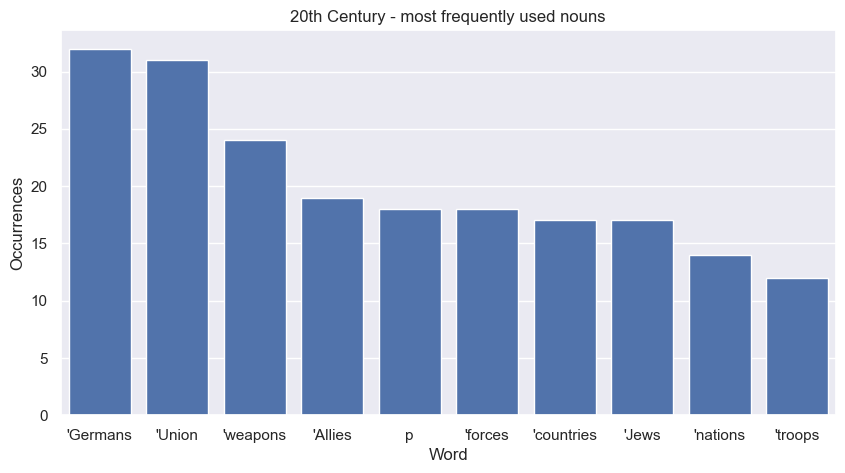

In [83]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Occurrences", saturation=0.9, data=top10).set_title("20th Century - most frequently used nouns")
plt.show()

In [93]:
df = df_text[(df_text['Word type'] == "JJ") | (df_text['Word type'] == "JJR") | (df_text['Word type'] == "JJS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(15, 'Occurrences')

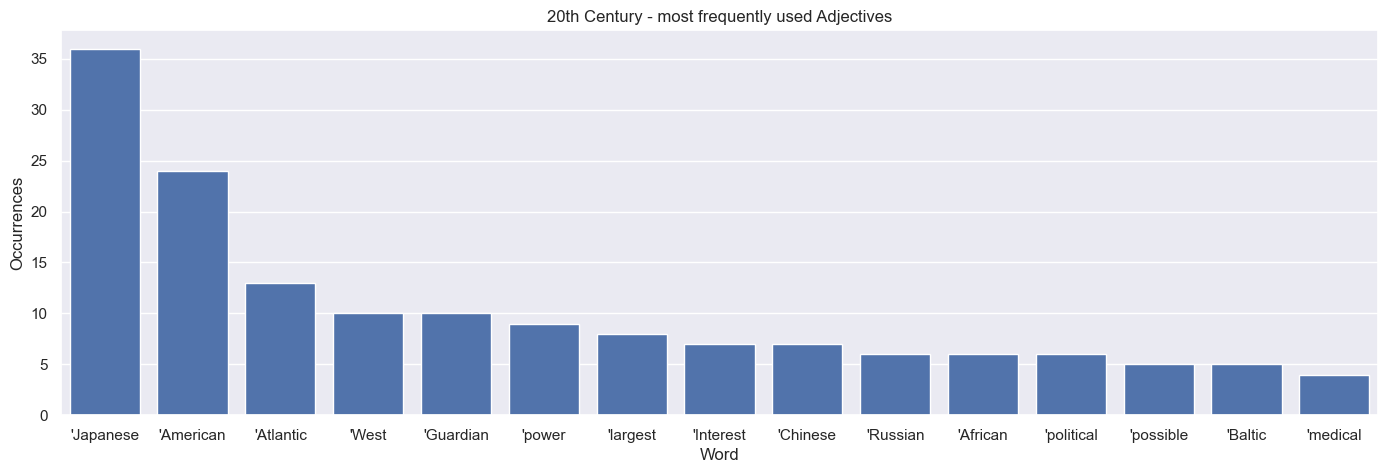

In [99]:
plt.figure(figsize=(17, 5))
sns.barplot(x="Word", y="Occurrences", saturation=0.9, data=top10).set_title("20th Century - most frequently used Adjectives")
plt.show()

In [107]:
df = df_text[(df_text['Word type'] == "VB") | (df_text['Word type'] == "VBG") | (df_text['Word type'] == "VBD") | (df_text['Word type'] == "VBN") | (df_text['Word type'] == "VBP") | (df_text['Word type'] == "VBZ")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(15, 'Occurrences')

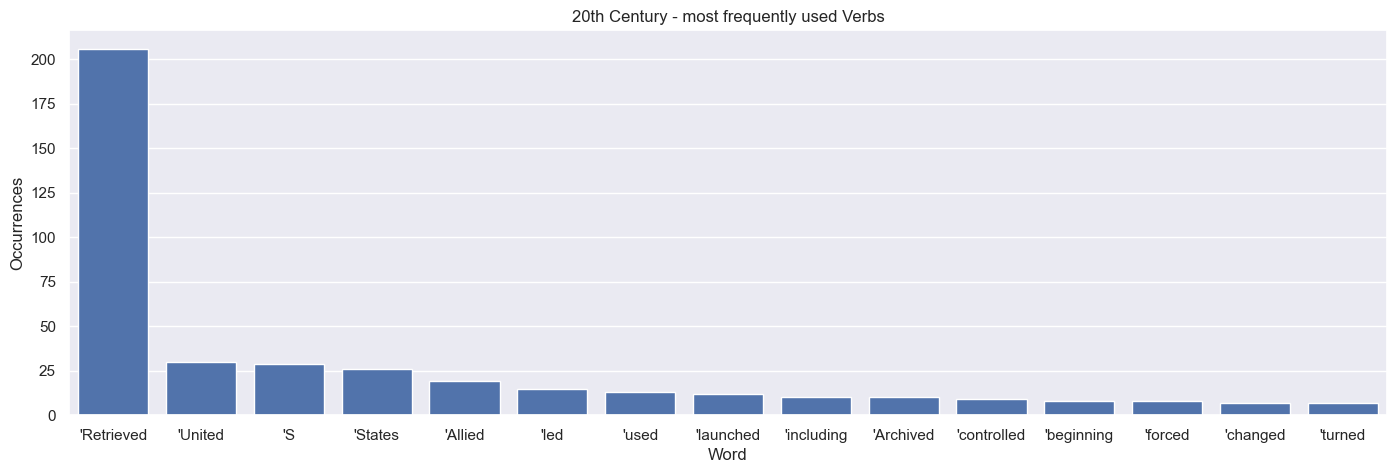

In [109]:
plt.figure(figsize=(17, 5))
sns.barplot(x="Word", y="Occurrences", saturation=0.9, data=top10).set_title("20th Century - most frequently used Verbs")
plt.show()

From all the nouns, adjectives, and verbs that are most frequently used you can see the full impact of World War's 1 and 2 in the 20th century.

In [118]:
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Key events th century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload file Search Search Appearance Donate Create account Log Personal tools Donate Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events th century Toggle Historic events th century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links Toggl

In [120]:
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [122]:
all_counts

Counter({'December': 222,
         'Retrieved': 206,
         'War': 129,
         'war': 91,
         'th': 87,
         'World': 78,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 43,
         'century': 42,
         'History': 41,
         'www': 39,
         'ISBN': 39,
         'In': 38,
         'first': 38,
         'world': 37,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'II': 32,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 30,
         'September': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'August': 25,
         'June': 25,
         'Battle': 25,
         'July': 25,
         'end': 24,
         'history': 24,
         'This': 24,
         'American': 24,
         

In [128]:
countries_df = pd.read_csv ("countries_list_20th_century_1.5.csv")

In [130]:
countries_df

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
...,...,...
204,205,Sahrawi Arab Democratic Republic
205,206,Somaliland
206,207,South Ossetia
207,208,Taiwan


In [132]:
countries_df ["country_name"] = countries_df ["country_name"].str.strip()

In [134]:
countries_df

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
...,...,...
204,205,Sahrawi Arab Democratic Republic
205,206,Somaliland
206,207,South Ossetia
207,208,Taiwan


In [138]:
countries_list = countries_df['country_name'].to_list()

In [140]:
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [152]:
dct = {v:[k] for v,k in dict_of_counts.items()}
df = pd.DataFrame(dct)

In [154]:
df= df.T.reset_index()

In [156]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [158]:
df.columns=["countries","counts"]

In [160]:
df

,countries,counts
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


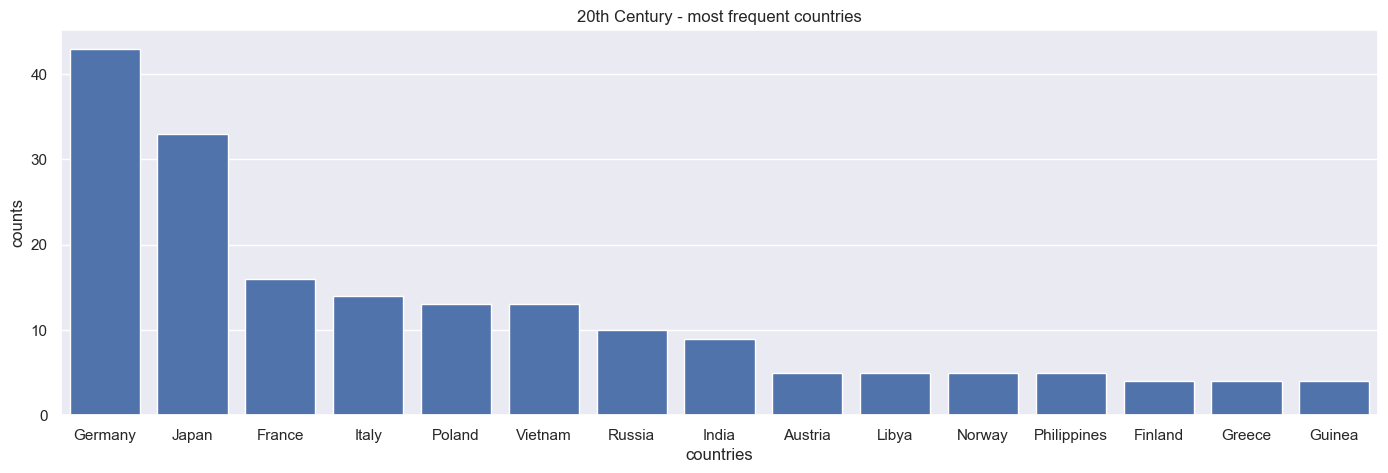

In [164]:
plt.figure(figsize=(17, 5))
sns.barplot(x="countries", y="counts", saturation=0.9, data=df.nlargest(15,"counts")).set_title("20th Century - most frequent countries")
plt.show()

Germany and Japan were major players in World War 2. Germany for it's meteoric rise of dictator Adolf Hitler and his Nazi regime annexing Poland, and Japan for it's bombing of Pearl Harbor.